In [4]:
import numpy as np
import matplotlib.pyplot as plt
# User defined libraries.
from BeamPropagator import BeamPropagator
import HelperFuns as hf

Below we are trying to replicate the code involved in the original BP code. It is replicating a 4F system. The focal length is 5615, and the hologram region is a length of 7812.5 centered in the region. The wavelength is 1 um, and all physical units are in microns.

In [23]:
#Define propagators for optical regions.
bp_free = BeamPropagator(wavelen=1)
bp_hol = BeamPropagator(wavelen=1, index=2)
#Define x-dimension sampling for both propgagators.
bp_free.set_x_array(x_length=4000, num_samples=4096)
bp_hol.set_x_array(x_length=4000, num_samples=4096)
#Enable absorbing boundary conditions for both propagators.
bp_free.set_abs_bcs(width_factor=128)
bp_hol.set_abs_bcs(width_factor=128)
#Define optical elements in system. Physical units in microns.
lens = hf.lens_phase_transform(x = bp_free.x_arr, focal_len=5615, wavelen=1.0)
# Define initial beam. Physical units in microns.
E0 = hf.gaussian_amp(A=3, x = bp_free.x_arr, waist=2.5, mu=-450)
bp_free.set_init_Efield(E0)

## Test Constant Indices

In [3]:
#Make storage objects for propagated fields and z-values.
z_vals = []
all_fields = []

In [4]:
# Define z-dimension sampling and propagate.
bp_free.set_z_array(z_length=5615, num_samples=500)
E_proped = bp_free.propagate()
# Add results to storage.
z_vals.extend(bp_free.z_arr)
all_fields.extend(bp_free.field_steps)

In [5]:
# Multiply by lens transform.
E1 = lens * E_proped
# Update z-dimension sampling.
bp_free.set_z_array(z_length=1708.75, num_samples=150)
# Update initial field.
bp_free.set_init_Efield(E1)
# Propagate.
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.z_arr + z_vals[-1])
all_fields.extend(bp_free.field_steps)

In [6]:
# Propagate through "hologram".
bp_hol.set_z_array(z_length=7812.5, num_samples=1000)
bp_hol.set_init_Efield(E_proped)
E_proped = bp_hol.propagate()
#Store results.
all_fields.extend(bp_hol.field_steps)
z_vals.extend(bp_hol.z_arr + z_vals[-1])

In [7]:
# Propagate through free space.
bp_free.set_z_array(z_length=1708.75, num_samples=150)
bp_free.set_init_Efield(E_proped)
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.z_arr + z_vals[-1])
all_fields.extend(bp_free.field_steps)

In [8]:
# Multiply by lens transform.
E1 = E_proped * lens
# Update propagation distance.
bp_free.set_z_array(z_length=5615, num_samples=500)
# Update initial field.
bp_free.set_init_Efield(E1)
# Propagate.
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.z_arr + z_vals[-1])
all_fields.extend(bp_free.field_steps)

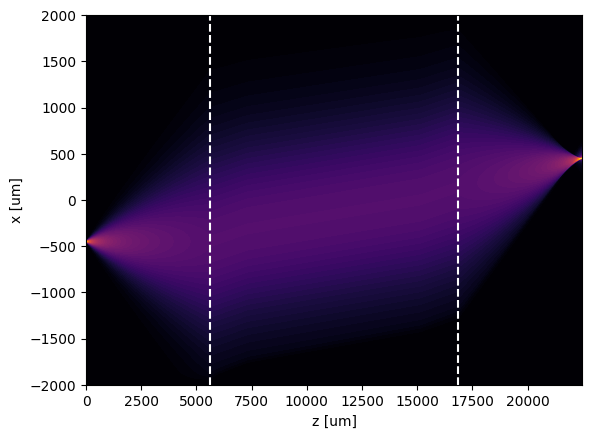

In [10]:
#Plotting time!
plt.contourf(z_vals, bp_free.x_arr, np.transpose(np.abs(all_fields))**(1/2),100,cmap='inferno')
plt.vlines([5615, 3*5615], -2000, 2000, colors='white',linestyles='dashed')
plt.ylabel("x [um]")
plt.xlabel("z [um]")
plt.show()

## Test Simple Hologram

In [3]:
#Make storage objects for propagated fields and z-values.
z_vals = []
all_fields = []
bp_free.set_init_Efield(E0)
# Define z-dimension sampling and propagate.
bp_free.set_z_array(z_length=5615, num_samples=500)
E_proped = bp_free.propagate()
# Add results to storage.
z_vals.extend(bp_free.z_arr)
all_fields.extend(bp_free.field_steps)
# Multiply by lens transform.
E1 = lens * E_proped
# Update z-dimension sampling.
bp_free.set_z_array(z_length=1708.75, num_samples=150, z_offset = z_vals[-1])
# Update initial field.
bp_free.set_init_Efield(E1)
# Propagate.
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.z_arr)
all_fields.extend(bp_free.field_steps)

In [4]:
bp_hol.set_z_array(z_length=7812.5, num_samples=1000, z_offset = z_vals[-1])
# Set the hologram modulation.
idx_mod = (1/60) * np.cos((2*np.pi/bp_hol.wl) * bp_hol.x_arr)
bp_hol.set_x_idx_pertubation(idx_mod)
# Propagate through "hologram".
bp_hol.set_init_Efield(E_proped)
E_proped = bp_hol.propagate()
#Store results.
all_fields.extend(bp_hol.field_steps)
z_vals.extend(bp_hol.z_arr)

In [ ]:
# Propagate through free space.
bp_free.set_z_array(z_length=1708.75, num_samples=150, z_offset = z_vals[-1])
bp_free.set_init_Efield(E_proped)
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.z_arr)
all_fields.extend(bp_free.field_steps)
# Multiply by lens transform.
E1 = E_proped * lens
# Update propagation distance.
bp_free.set_z_array(z_length=5615, num_samples=500, z_offset = z_vals[-1])
# Update initial field.
bp_free.set_init_Efield(E1)
# Propagate.
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.z_arr)
all_fields.extend(bp_free.field_steps)

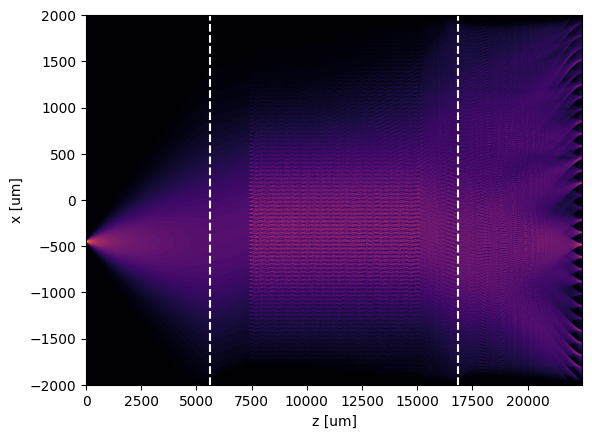

In [7]:
#Plotting time!
plt.contourf(z_vals, bp_hol.x_arr, np.transpose(np.abs(all_fields))**(1/2),100,cmap='inferno')
plt.vlines([5615, 3*5615], -2000, 2000, colors='white',linestyles='dashed')
plt.ylabel("x [um]")
plt.xlabel("z [um]")
plt.show()

## Test Full-Region Index Behavior

In [3]:
#Make storage objects for propagated fields and z-values.
z_vals = []
all_fields = []
bp_free.set_init_Efield(E0)
# Define z-dimension sampling and propagate.
bp_free.set_z_array(z_length=5615, num_samples=500)
E_proped = bp_free.propagate()
# Add results to storage.
z_vals.extend(bp_free.z_arr)
all_fields.extend(bp_free.field_steps)
# Multiply by lens transform.
E1 = lens * E_proped
# Update z-dimension sampling.
bp_free.set_z_array(z_length=1708.75, num_samples=150, z_offset = z_vals[-1])
# Update initial field.
bp_free.set_init_Efield(E1)
# Propagate.
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.z_arr)
all_fields.extend(bp_free.field_steps)

In [9]:
bp_hol.set_z_array(z_length=7812.5, num_samples=1000, z_offset = z_vals[-1])
# Set the hologram modulation.
idx_mod = (1/60) * np.cos((2*np.pi/bp_hol.wl) * bp_hol.x_arr)
bp_hol.set_z_dep_idx(np.array([idx_mod] * len(bp_hol.z_arr)))
# Propagate through "hologram".
bp_hol.set_init_Efield(E_proped)
E_proped = bp_hol.propagate()
#Store results.
all_fields.extend(bp_hol.field_steps)
z_vals.extend(bp_hol.z_arr)

In [10]:
# Propagate through free space.
bp_free.set_z_array(z_length=1708.75, num_samples=150, z_offset = z_vals[-1])
bp_free.set_init_Efield(E_proped)
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.z_arr)
all_fields.extend(bp_free.field_steps)
# Multiply by lens transform.
E1 = E_proped * lens
# Update propagation distance.
bp_free.set_z_array(z_length=5615, num_samples=500, z_offset = z_vals[-1])
# Update initial field.
bp_free.set_init_Efield(E1)
# Propagate.
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.z_arr)
all_fields.extend(bp_free.field_steps)

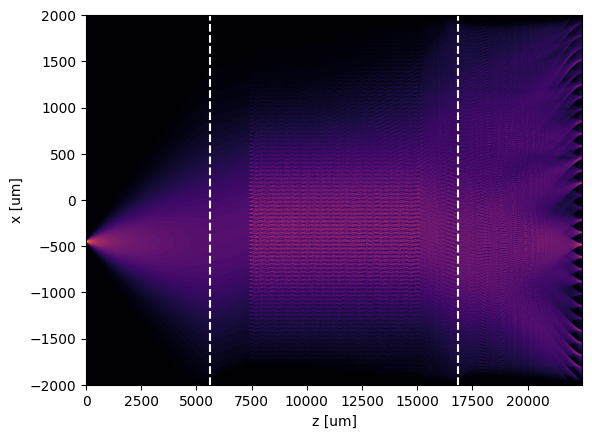

In [11]:
#Plotting time!
plt.contourf(z_vals, bp_hol.x_arr, np.transpose(np.abs(all_fields))**(1/2),100,cmap='inferno')
plt.vlines([5615, 3*5615], -2000, 2000, colors='white',linestyles='dashed')
plt.ylabel("x [um]")
plt.xlabel("z [um]")
plt.show()

## Test Intensity Index Updating

In [6]:
def prop_full_region(init, prop_free, prop_hol, all = False):
    z_vals = []
    all_fields = []
    prop_free.set_init_Efield(init)
    # Define z-dimension sampling and propagate.
    prop_free.set_z_array(z_length=5615, num_samples=500)
    E_proped = prop_free.propagate()
    # Add results to storage.
    z_vals.extend(prop_free.z_arr)
    all_fields.extend(prop_free.field_steps)
    # Multiply by lens transform.
    E1 = lens * E_proped
    # Update z-dimension sampling.
    prop_free.set_z_array(z_length=1708.75, num_samples=150, z_offset = z_vals[-1])
    # Update initial field.
    prop_free.set_init_Efield(E1)
    # Propagate.
    E_proped = prop_free.propagate()
    # Store results.
    z_vals.extend(prop_free.z_arr)
    all_fields.extend(prop_free.field_steps)

    # Propagate through the hologram.
    prop_hol.set_z_array(z_length=7812.5, num_samples=1000, z_offset = z_vals[-1])
    # Propagate through "hologram".
    prop_hol.set_init_Efield(E_proped)
    E_proped = prop_hol.propagate()
    #Store results.
    all_fields.extend(prop_hol.field_steps)
    z_vals.extend(prop_hol.z_arr)

    #Store hologram fields.
    hol_field = prop_hol.field_steps

    # Propagate through free space.
    prop_free.set_z_array(z_length=1708.75, num_samples=150, z_offset = z_vals[-1])
    prop_free.set_init_Efield(E_proped)
    E_proped = prop_free.propagate()
    # Store results.
    z_vals.extend(prop_free.z_arr)
    all_fields.extend(prop_free.field_steps)
    # Multiply by lens transform.
    E1 = E_proped * lens
    # Update propagation distance.
    prop_free.set_z_array(z_length=5615, num_samples=500, z_offset = z_vals[-1])
    # Update initial field.
    prop_free.set_init_Efield(E1)
    # Propagate.
    E_proped = prop_free.propagate()
    # Store results.
    z_vals.extend(prop_free.z_arr)
    all_fields.extend(prop_free.field_steps)

    if all:
        return hol_field, all_fields, z_vals
    else:
        return hol_field, E_proped


In [24]:
h_field, new_E = prop_full_region(E0, bp_free, bp_hol, False)
# Update indices.
reg_idx = np.ones(shape = h_field.shape) * 2
new_idx = hf.update_idx_intensity(reg_idx, np.abs(h_field)**2, int_coeff=0.08)
bp_hol.set_z_dep_idx(new_idx)
# Re-propagate.
# Keep going.
for i in range(4):
    fields, new_E = prop_full_region(E0, bp_free, bp_hol, False)
    new_idx = hf.update_idx_intensity(bp_hol.idx_arr, np.abs(h_field)**2, int_coeff=0.08)
    bp_hol.set_z_dep_idx(new_idx)
_, fields, z_vals = prop_full_region(E0, bp_free, bp_hol, True)
# Unmask global variable _.
del _

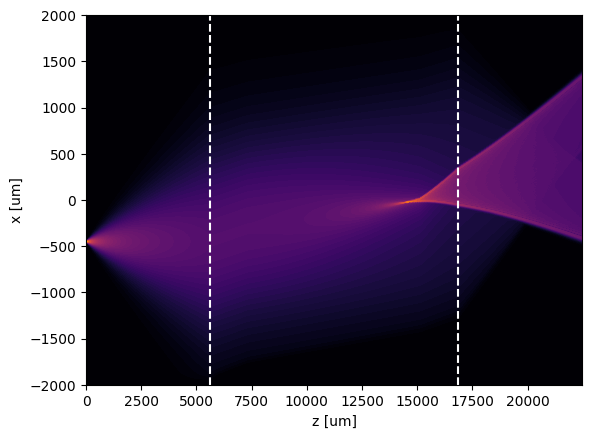

In [25]:
# Plot result.
plt.contourf(z_vals, bp_hol.x_arr, np.transpose(np.abs(fields))**(1/2),100,cmap='inferno')
plt.vlines([5615, 3*5615], -2000, 2000, colors='white',linestyles='dashed')
plt.ylabel("x [um]")
plt.xlabel("z [um]")
plt.show()